# EXPLORATORY DATA ANALYSIS

Once we got a clean dataset, the next phase was Exploratory Data Analysis (EDA). EDA is the process of figuring out patterns, relationships, or anomalies to help in our subsequent analysis.
Univariate and bi-variate analysis are performed to find relationships between certain set of variables. The absenteeism being the primary target key of this study, we have taken a look at the distribution of reason for this(absenteeism) of employees in the company and found that the highest percentage reason considering the defaulters fall in 22-28 range, which are cases of no follow-up.


In [37]:
# load the training dataset
# categorical dataset
mydata_cat = pd.read_csv('cleanDataset_categoricalTarget.csv')
#continous dataset
mydata_con = pd.read_csv('cleanDataset_continuousTarget.csv')


Text(0.5, 1.0, 'Reason of Absenece')

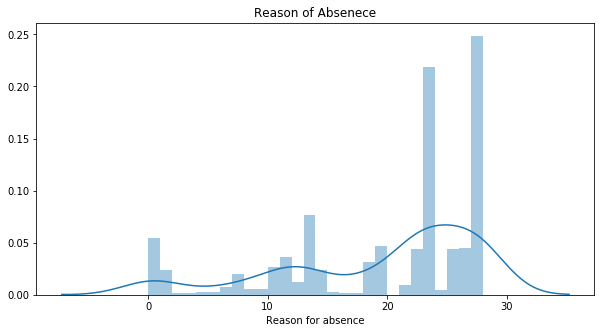

In [27]:
# Distribution of Reason of Absence
plt.figure(figsize=(10,5))
sns.distplot(mydata_con['Reason for absence'],bins = 28)
plt.title("Reason of Absenece")

#### Distribution of Reason for absence 	
Continuing the data exploratory analysis on the  hours of absenteeism, across different months, shows high variation for cases where the patients’ needs follow-up compared to no follow-up. The average absenteeism hours for a reason which needs follow-up is 70% greater than, which requires no follow-up.


   Seasons  Absenteeism time in hours
0        1                        955
1        2                       1149
2        3                       1143
3        4                       1239


<Figure size 720x360 with 0 Axes>

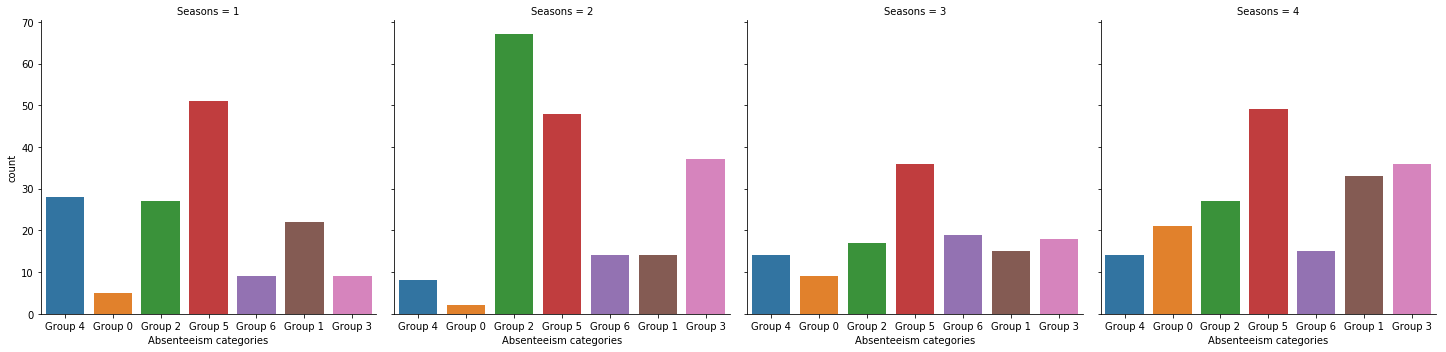

In [28]:
# Absenteeism categories w.r.t seasons
plt.figure(figsize = (10,5))
#fig, axes = plt.subplots(2,2)
sns.catplot(x ='Absenteeism categories',kind = 'count',col = "Seasons",data = mydata_cat)

season_abs_groups = mydata_con.groupby(['Seasons'],as_index = False).agg({'Absenteeism time in hours': "sum"})
print(season_abs_groups)

#### Absenteeism grouped w.r.t seasons

Below table shows the absenteeism time in hours, in various seasons for different reasons among employees in the company.
Seasons	Absenteeism time in hours
1 - Summer	955
2 - Winter	1152
3 - Spring	1151
4 - Fall	1239


When looked into the absenteeism time, on a particular working day in a week, we observed outliers in the first three days of week, and it is obviously making sense after a tiresome weekend activities.


<Figure size 1440x360 with 0 Axes>

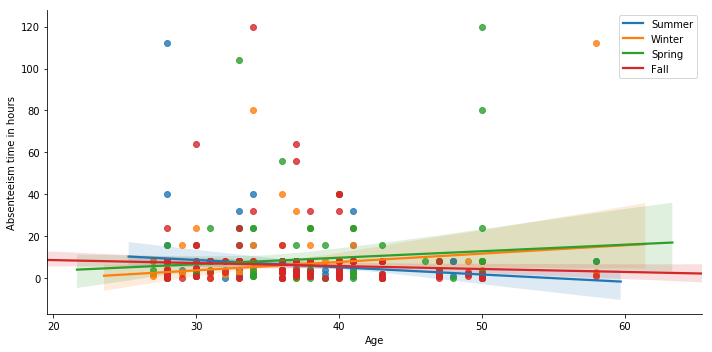

In [30]:
# study of age and seasons on Absenteeism
plt.figure(figsize = (20,5))
sns.lmplot(x = 'Age',y = 'Absenteeism time in hours',data = mydata_con,hue = 'Seasons',size=5,aspect=2,legend=False)
plt.legend(['Summer','Winter','Spring','Fall'])

#### Effect of Age on Absenteeism time in various seasons.

With the following ‘reg’ joint plot between Distance from Residence to Work and Absenteeism time in hours, we inferred the presence of some association between variables. we can see individual Pearson residual(-0.082) in order to check association of each variables. By Looking into result, we can say that the distance from residence to work is more, there seems less absenteeism hours


Text(0.5, 1.0, 'Mean absentism in different months')

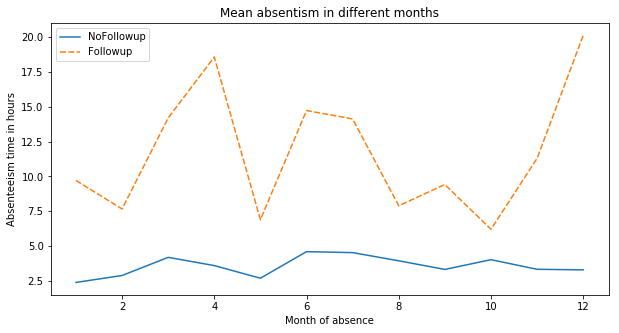

In [31]:
# line graph for  mean of Absenteeism in hours in different months
plt.figure(figsize=(10,5))
mean_abs_per_month = mydata_con.groupby(['Month of absence','followUp_req'],as_index = False).agg({'Absenteeism time in hours': "mean"})
#print(mean_abs_per_month)
sns.lineplot('Month of absence','Absenteeism time in hours',hue = 'followUp_req',style = 'followUp_req',data = mean_abs_per_month)

plt.legend(['NoFollowup','Followup'])
plt.title("Mean absentism in different months")


#### Distribution of absenteeism in various months w.r.t follow-up needed or not

Conceptually though there were more records of absence, for no patient follow-up, but the number of absenteeism hours is comparatively less,( i.e 40% approximately) when compared to categories where patients need follow-up. The following bar plot suggests that employees with “Diseases of the musculoskeletal system and connective tissue “ are high percentage(i.e 17% approximately) of defaulters. 

In [32]:
# absenteeism hours
mydata_con.groupby(['Reason for absence']).agg({"Absenteeism time in hours":"sum"})


,Absenteeism time in hours
Reason for absence,
0,0
1,182
2,24
3,8
4,9
5,16
6,40
7,134
8,27


Text(0.5, 1.0, 'Absenteeism on each workingday')

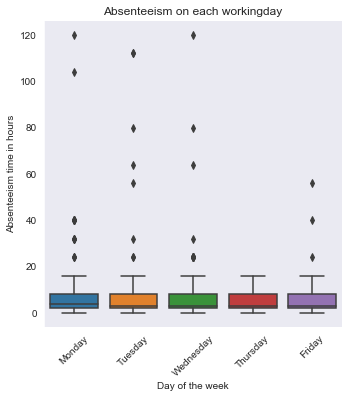

In [33]:
# boxplot for weekdays
sns.set_style(style='dark')
j = sns.factorplot("Day of the week", "Absenteeism time in hours", data=mydata_con, kind="box")
labels = ['Monday','Tuesday','Wednesday','Thursday','Friday']
j.set_xticklabels(labels,rotation = 45)
plt.title('Absenteeism on each workingday')

#### Absenteeism time in hours w.r.t Weekdays
Age is another factor, which according to psychology of human being effects the proficiency of work and increase in absenteeism in hours due to health reasons. contradictorily, in the given data set, age has  effect or association with absenteeism in hours, with p-value of 0.38, less than level of significance of 0.5.


Text(0.5, 1.0, 'Absenteeism time for various reasons')

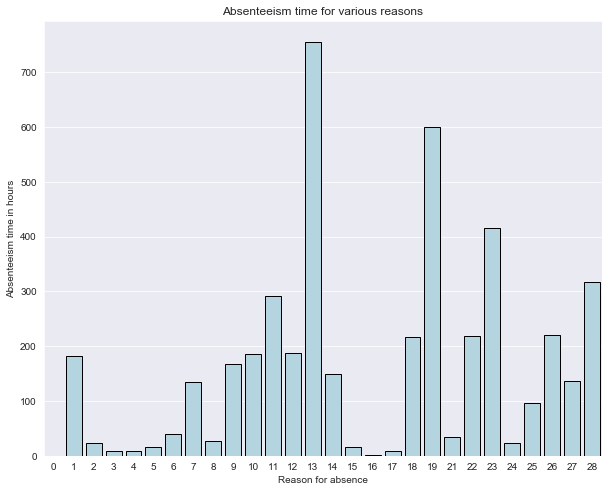

In [34]:
#Absenteeism hours for different reasons
plt.figure(figsize=(10,8))
sns.set_style(style = "darkgrid")
count_absents = pd.DataFrame(mydata_con.groupby('Reason for absence',as_index = False).agg({'Absenteeism time in hours':'sum'}))
count_absents.sort_values('Absenteeism time in hours',ascending = True,inplace = True)
#print(count_absents)

#plot  the graph
sns.barplot('Reason for absence','Absenteeism time in hours',data = count_absents, color = 'lightblue',edgecolor='black')
plt.title("Absenteeism time for various reasons")


#### Absenteeism time w.r.t to reason of absence
After categorizing the Absenteeism into 7 different groups, based on the hours, is visualized as below.
Groups 0-6 indicate less than 1hour, 1-2 hour, 2-3hours, 3-7hours, 7-8 hours, 8-9 hours, more than 9 hours respectively.Group5  i.e the number of 8 hours absence time is the  highest group of absenteeism(185 count), is relatively 22%(approximately) more than Group 0 (i.e less than 1hour) which has the least number of absentees, that is equal to 37.All the other groups, fall between these two groups.


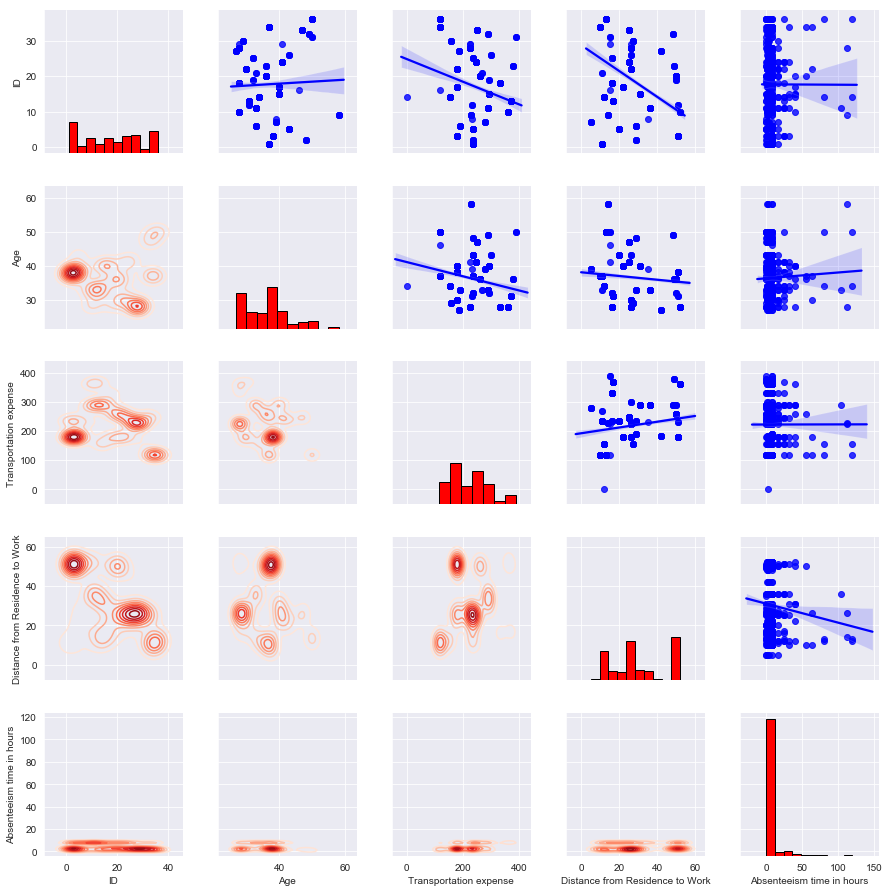

In [37]:
# pair wise grid
grid = sns.PairGrid(data= mydata_con,
                    vars = ['ID','Age', 'Transportation expense', 'Distance from Residence to Work','Absenteeism time in hours'])

# Map a scatter plot to the upper triangle
grid = grid.map_upper(sns.regplot, color = 'blue')


# Map a histogram to the diagonal
grid = grid.map_diag(plt.hist, bins = 10, color = 'red', 
                     edgecolor = 'k')

# Map a density plot to the lower triangle
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')

#### Pairwise plot between ID, Age, Transport expense, Distance from Residence to work and Absenteeism time in hours.

A pairwise plot is used  to see both distribution of single variables and relationships between two variables and  are a great method to identify the relationship between the varaibles for analysis. The histogram on the diagonal demonstrates the distribution of a single variable, while the scatter plots on the upper and kernel density estimation (KDE) plot on the lower triangles show the relationship between two variables.
From the plot we can infer that Absenteeism time in hours is independent of ID and Age factor. Whereas the target variable is dependent on slightly on Transport expense and more negatively on Distance from Residence.


In [38]:
# store the training dataset in a local variable
dataset_categorical =mydata_cat
dataset_continuous = mydata_con


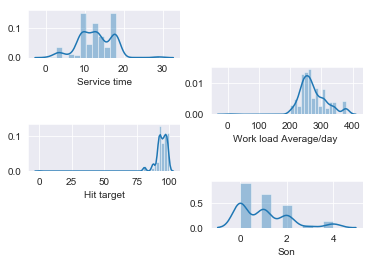

In [39]:
plt.figure(1)
plt.subplot(421)
sns.distplot(dataset_categorical['Service time'])

plt.subplot(424)
sns.distplot(dataset_categorical['Work load Average/day '])

plt.subplot(425)
sns.distplot(dataset_categorical['Hit target'])

plt.subplot(428)
sns.distplot(dataset_categorical['Son'])

#### Probability density plot for Service Time, Work load Average/Day, Hit target and Son
We created this probability density plot to visually get a sense of the distribution of the data. From this PDF plot we can see that Hit Target and Work Load Average/Day are following a closely normal distribution within the range of data that exists for these features. On the other hand, Service Time and Son (i.e # of children) do not show any obvious distribution pattern.


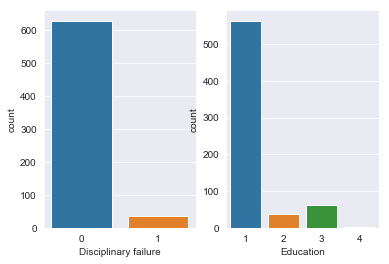

In [40]:
# categorical variables
plt.figure(2)
plt.subplot(121)
sns.countplot(dataset_categorical['Disciplinary failure'])

plt.subplot(122)
sns.countplot(dataset_categorical['Education'])

#### Bar plots for Education and Disciplinary failure.
In the left hand side column of the figure, we're looking at the total count of Education and Disciplinary variables differentiated in color by their categories. The Education count plot shows that most employees in this data set have a high school education only. . And the Disciplinary failure plot shows that very few employees have had disciplinary failure. We have more people with high school education, so naturally the sum of absent hours is highest for that group. 

Text(0, 0.5, 'Sum of Absenteeism time in hours')

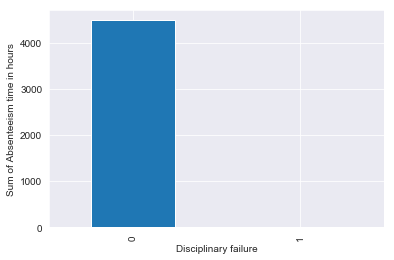

In [41]:
# plot between dependent and independent variable

subset = dataset_continuous.groupby('Disciplinary failure')['Absenteeism time in hours'].sum()

fig = plt.figure()

ax = fig.add_subplot(111)
subset.plot(kind='bar')

ax.set_ylabel('Sum of Absenteeism time in hours')

#### Aggregate of total absent hours for Disciplinary failure
We expected to see employees with disciplinary failure might have more absent hours, but that was not the case. For employees with disciplinary failure, there are number of absent hours is actually zero.

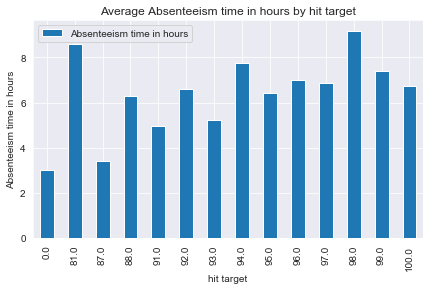

In [44]:
hit = dataset_continuous.groupby('Hit target')[['Absenteeism time in hours']].mean()
ax = hit.plot(kind='bar', figsize=(7,4), legend=True)
ax.set_xlabel('hit target')
ax.set_ylabel('Absenteeism time in hours')
ax.set_title('Average Absenteeism time in hours by hit target')
plt.show()

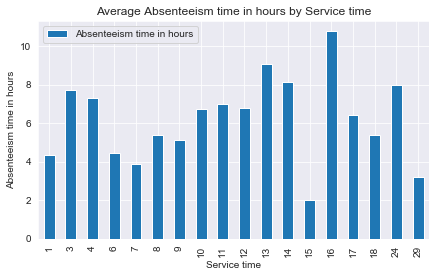

In [46]:
data_ser = dataset_continuous.groupby('Service time')[['Absenteeism time in hours']].mean()
ax = data_ser.plot(kind='bar', figsize=(7,4), legend=True)
ax.set_xlabel('Service time')
ax.set_ylabel('Absenteeism time in hours')
ax.set_title('Average Absenteeism time in hours by Service time')
plt.show()

#### Bar plots Hit Target, Service Time vs Average Absenteeism hours
Through these plots of Hit Target, Service Time variables plotted against the Average of absenteeism hours of their respective groups, we wanted to observe if there is any relationship between specific values of these variables and the corresponding average value of absenteeism hours for that group. And we see that there is no significant relationship or pattern with these variables either. 

In [47]:
#Consider necessary columns only
# Drop duplicates
df1 = mydata_con
df1 = df1[['ID', 'Reason for absence', 'Month of absence', 
           'Social drinker', 'Social smoker', 'Pet', 'Weight',
           'Height', 'Body mass index', 'Absenteeism time in hours',
          'followUp_req']]
df1.drop_duplicates()
df1.head()


,ID,Reason for absence,Month of absence,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,followUp_req
0,11,26,7,1,0,1,90.0,172,30,4,0
1,36,0,7,1,0,0,98.0,178,31,0,1
2,3,23,7,1,0,0,89.0,170,31,2,0
3,7,7,7,1,1,0,68.0,168,24,4,1
4,11,23,7,1,0,1,90.0,172,30,2,0


In [48]:
# Aggregate absenteeism hours by grouping by ID, irrpespective or Reason/Month
df2 = df1.groupby(['ID', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index'],
                   as_index = False).agg({'Absenteeism time in hours': "sum"})
df2.head(10)

,ID,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,1,0,0,1,88.0,172,29,109
1,2,0,1,5,88.0,163,33,25
2,3,1,0,0,89.0,170,31,479
3,5,1,0,0,106.0,167,38,92
4,6,0,0,2,69.0,167,25,56
5,7,1,1,0,68.0,168,24,30
6,8,1,0,2,100.0,170,35,0
7,9,0,0,1,65.0,172,22,134
8,10,1,0,4,80.0,172,27,170
9,11,1,0,1,90.0,172,30,442


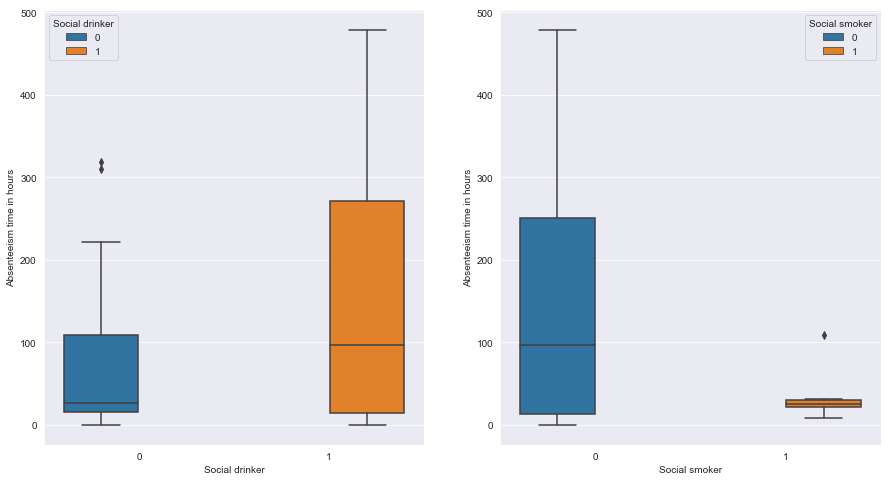

In [50]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15, 8)
sns.factorplot('Social drinker',
               'Absenteeism time in hours',
               'Social drinker',
               data=df2,
               kind="box",
               size=6, aspect=0.5, ax=ax[0])

sns.factorplot('Social smoker',
               'Absenteeism time in hours',
               'Social smoker',
               data=df2,
               kind="box",
               size=6, aspect=0.5, ax=ax[1])


plt.close(2)
plt.close(3)

#### Box plots for Social Drinker/Smoker Vs Sum of total Absenteeism hours
We took a look at the box plots of total sum absenteism hours for social smoker on the left hand side and the social drinkers on the right hand side plot of this figure. The yellow means that he/she is a smoker or a drinker and the blue means he is not a smoker or a drinker. This was actually very surprising to see, because we expected to see more absent hours for people who smoke, but that is very less as we can see from the graph on the left side. However, social drinkers seem to be more absent than non-drinkers, which is more or less expected.


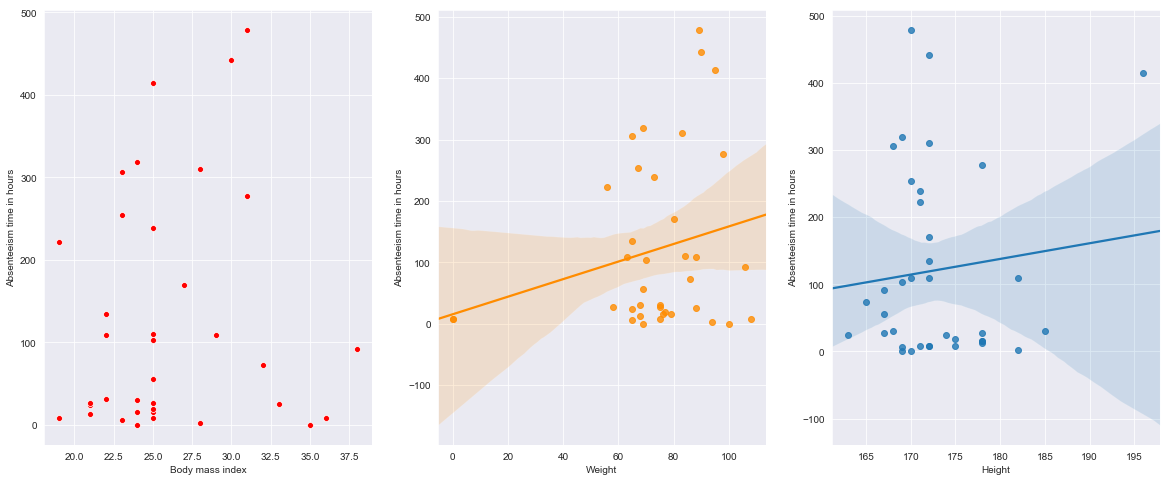

In [51]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(20, 8)
sns.regplot('Weight', 'Absenteeism time in hours', color = 'darkorange', data=df2, ax=ax[1] )
sns.regplot('Height', 'Absenteeism time in hours', data=df2, ax=ax[2])
sns.scatterplot('Body mass index', 'Absenteeism time in hours', color='red', data=df2, ax=ax[0])

#### Scatter plots for Height, Weight, BMI vs Sum of total Absenteeism hours
We created these scatter plots, to see how total number absenteesim hours relate to height, weight and Body mass index. By observing these scatter plots we can deduce that there is no obvious relationship between these variables and absenteesim hours. Also, body mass index is a function of height and weight anyway, so if height and weight are not related to absenteeism hours, then obviously BMI will also be unrelated. 
